In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ethender/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task1:
a. Use Pandas to load both trainingSet.csv and testingSet.csv (1 mark).
Loaded the Training set and Test set

In [2]:
trainingSet = pd.read_csv('trainingSet.csv')
testSet = pd.read_csv('testingSet.csv')
trainingSet

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,12,39,6,20,20,12,7,91,140,200,61,20,131,-1
360,22,31,0,7,16,13,11,101,130,192,57,26,132,1
361,0,1,0,0,1,1,1,3,3,5,3,5,5,-1
362,4,7,0,11,4,4,1,23,23,38,14,10,40,-1


Task1
b) Find the number of patterns in each class for both loaded data sets using Python 


Found the Pattern for each class 

Categorical Data:
    - DEFECTIVE
Numerical Data:
    - Loc_Blank
    - Branch_count
    - LOC_CODE_AND_COMMENT
    - LOC_COMMENTS
    - CYCLOMATIC_COMPLEXITY
    - DESIGN_COMPLEXITY
    - ESSENTIAL_COMPLEXITY
    - LOC_EXECUTABLE
    - NUM_OPERANDS
    - NUM_OPERATORS
    - NUM_UNIQUE_OPERANDS
    - NUM_UNIQUE_OPERATORS
    - LOC_TOTAL

Dividing Independent data and dependent data

In [3]:
trainX = trainingSet.loc[:,:'LOC_TOTAL']
trainY = trainingSet.loc[:,'DEFECTIVE']
testX = testSet.loc[:,'LOC_TOTAL']
testY = testSet.loc[:,'DEFECTIVE']

Correlation between Data. 

1. CYCLOMATIC_COMPLEXITY
2. DESIGN_COMPLEXITY
3. ESSENTIAL_COMPLEXITY

Has strong correlations between them.

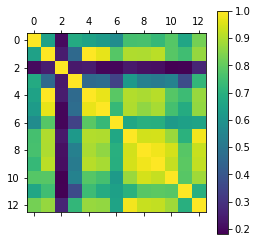

In [17]:
plt.matshow(trainX.corr())
plt.colorbar()

Task1
c) Choose an attribute and generate a boxplot for the two classes in the training set

Using Box Plot for Design Complexity for defective and non defective 

(-4, 40)

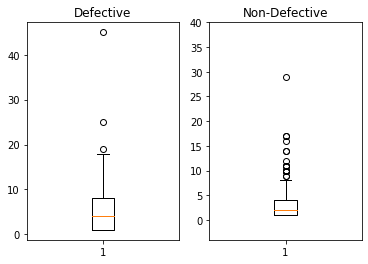

In [7]:
#np.where(trainY == 1)
defectTrain = trainX.iloc[np.where(trainY == 1)]
ndefectTrain = trainX.iloc[np.where(trainY == -1)]
plt.subplot(1,2,1)
plt.boxplot(defectTrain.loc[:,'DESIGN_COMPLEXITY'])
plt.title('Defective')
plt.subplot(1,2,2)
plt.boxplot(ndefectTrain.loc[:,'DESIGN_COMPLEXITY'])
plt.title('Non-Defective')
plt.ylim(-4,40)

Task1
d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which
two features you want to use. You need to use the training set

Scatter plot against Design complexity vs CYCLOMATIC_COMPLEXITY
Result:
As the Design Complexity increases The Cyclomatic Complexity as also increases.
Data is showing exponential growth.

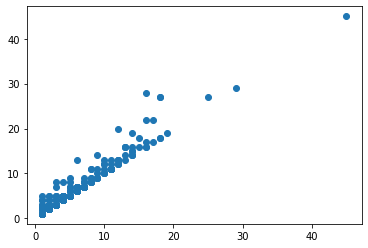

In [8]:
plt.scatter(trainX.loc[:,'DESIGN_COMPLEXITY'],trainX.loc[:,'CYCLOMATIC_COMPLEXITY'])

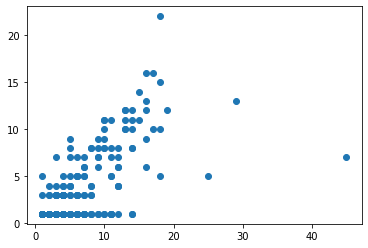

In [9]:
plt.scatter(trainX.loc[:,'DESIGN_COMPLEXITY'],trainX.loc[:,'ESSENTIAL_COMPLEXITY'])

Task 1
e) Divide the original training set into a smaller training set (II) and a validation set. In this task, you
need to use 55% of total training data points as the validation set

Dividing Training Set 
    - Training set 45%
    - Validation set 55%

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
code_Training_X,code_Validation_X,code_training_Y,code_testing_Y = train_test_split(trainX,trainY,test_size=0.55,random_state=42)